<a href="https://colab.research.google.com/github/isshii/de4test/blob/master/LIME/Lime_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras_applications.imagenet_utils import preprocess_input as preprocess_input
import os, re
import random
import keras
# models
from keras.applications import inception_v3 as inc_net
from keras.applications import resnet50 as resnet50
from keras.applications import vgg16 as vgg16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Input
from keras.preprocessing import image

from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
print('Notebook run using keras:', keras.__version__)

Using TensorFlow backend.


Notebook run using keras: 2.2.5


In [3]:
inet_model = inc_net.InceptionV3()
vgg16_model = vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None)















553467904/553467096 [==============================] - 13s 0us/step


In [0]:
def transform_img_fn(path_list, target_size=(299, 299)):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=target_size)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

In [5]:
# ドライブをマウントする
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
def load_image(filename):
  img = image.load_img(filename, target_size=(224, 224))
  return image.img_to_array(img)

In [0]:
# vgg16
images4vgg = [
  "/content/gdrive/My Drive/ColabNotebooks/test4ai/data/ImageNet/single/ILSVRC2012_test_00001582.JPEG"
 # "/content/gdrive/My Drive/ColabNotebooks/test4ai/data/ImageNet/single_de_output/occl_African_chameleon.png"
]

x = np.zeros((len(images4vgg), 224, 224, 3))

for i in range(0, len(images4vgg)):
  x[i] = load_image(images4vgg[i])

In [8]:
pred = vgg16_model.predict(preprocess_input(x))
print('pred.shape={shape}'.format(shape=pred.shape))

top = decode_predictions(pred, top=5)
for i in range(0, len(top)):
  print('{i}:'.format(i=i))
  for j in range(0, len(top[i])):
    name, desc, score = top[i][j]
    print('  {rank}    {desc} {score:02.1f}%'
	      .format(rank=j+1, desc=desc, score=score*100))



pred.shape=(1, 1000)
40960/35363 [==================================] - 0s 0us/step
0:
  1    African_chameleon 99.4%
  2    American_chameleon 0.4%
  3    green_lizard 0.1%
  4    banded_gecko 0.1%
  5    agama 0.1%


In [9]:
#lime  インストール
! pip install lime
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

     |████████████████████████████████| 276kB 4.8MB/s 
  Created wheel for lime: filename=lime-0.1.1.37-cp36-none-any.whl size=284277 sha256=c955acd3bfca8f1faa806aa49a2e596263dda1b0814de0b5317f3870a30ac409
  Stored in directory: /root/.cache/pip/wheels/c1/38/e7/50d75d4fb75afa604570dc42f20c5c5f5ab26d3fbe8d6ef27b
  Created wheel for progressbar: filename=progressbar-2.5-cp36-none-any.whl size=12073 sha256=a40422d72c1f8bf99e90a1d0f1108b7ac199d1234686b28029af5bd898bee77e
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built lime progressbar


In [0]:
explainer = lime_image.LimeImageExplainer()

In [11]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
imagesVV =  transform_img_fn(["/content/gdrive/My Drive/ColabNotebooks/test4ai/data/ImageNet/single/ILSVRC2012_test_00001582.JPEG"], (224, 224))

vgg16_explanation = explainer.explain_instance(imagesVV[0], vgg16_model.predict, top_labels=5, hide_color=0, num_samples=1000)

CPU times: user 16min 40s, sys: 850 ms, total: 16min 41s
Wall time: 8min 27s


In [0]:
from skimage.segmentation import mark_boundaries


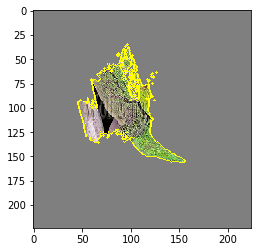

In [13]:
temp, mask = vgg16_explanation.get_image_and_mask(vgg16_explanation.top_labels[0], positive_only=True, num_features=1, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [14]:
print(mask)
print(mask.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(224, 224)
